### All Module Import

In [1]:
import numpy as np
import cv2
import os
from os import listdir
from os.path import isfile, join
import matplotlib.pyplot as plt
from scipy import ndimage
from PIL import Image
import math
import random
import sklearn
import sklearn.datasets
import sklearn.linear_model

In [2]:
def load_dataset():
    digit_direcroty_image_list = []
    for i in range(2):
        mypath = os.path.join('BanglaDigitZeroOne', str(i))
        onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]
        digit_direcroty_image_list.append([i, mypath, onlyfiles])

    image_digit_list = []
    for item in digit_direcroty_image_list:
        digit = item[0]
        digit_directory = item[1]
        image_list = item[2]
        for image in image_list:
            path = os.path.join(digit_directory, image)
            img = cv2.imread(path, cv2.IMREAD_UNCHANGED)
            resized = cv2.resize(img, (64,64), interpolation = cv2.INTER_AREA)
            image_digit_list.append([resized, digit])
    random.shuffle(image_digit_list)
    X = [i[0] for i in image_digit_list]  # Image 64*64 ndarray to X
    y = [i[1] for i in image_digit_list]  # Image label to y
    X = np.array(X)                       # ndarray list to numpy array shape (3964, 64, 64)
    y = np.array(y)                       # list to numpy array unranked shape (3964,)
    y = y.reshape(1,y.shape[0])           # unranked array to (1, 3964) shaped array
    return X,y

In [3]:
X,y = load_dataset()

In [4]:
print(X.shape)                       # (3964, 64, 64)
print(y.shape)                       # (1, 3964)

(3964, 64, 64)
(1, 3964)


1


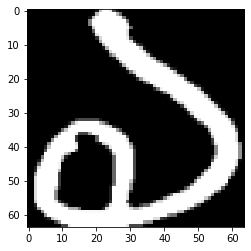

In [5]:
index = 546
print(np.squeeze(y[:, index]))
plt.imshow(X[index], cmap='gray', vmin=0, vmax=255)
plt.show()

In [6]:
dataset_length = len(X)
train_length = math.ceil(dataset_length*.8)
train_set_x_orig = X[:train_length]          # (3172, 64, 64)
train_set_y = y[:,:train_length]             # (1, 3172)
test_set_x_orig =X[train_length:]            # (792, 64, 64)
test_set_y = y[:,train_length:]              # (1, 792)

In [7]:
train_set_x_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[1]*train_set_x_orig.shape[2],train_set_x_orig.shape[0])     # (3172, 64, 64) ==> (4096, 3172)
test_set_x_flatten = test_set_x_orig.reshape(test_set_x_orig.shape[1]*test_set_x_orig.shape[2],test_set_x_orig.shape[0])          # (792, 64, 64) ==> (4096, 792)

In [8]:
print ("train_set_x_flatten shape: " + str(train_set_x_flatten.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x_flatten shape: " + str(test_set_x_flatten.shape))
print ("test_set_y shape: " + str(test_set_y.shape))

train_set_x_flatten shape: (4096, 3172)
train_set_y shape: (1, 3172)
test_set_x_flatten shape: (4096, 792)
test_set_y shape: (1, 792)


In [9]:
train_set_x = train_set_x_flatten/255.
test_set_x = test_set_x_flatten/255.

In [10]:
shape_X = train_set_x.shape
shape_Y = train_set_y.shape
m = train_set_x.shape[1]

print ('The shape of X is: ' + str(shape_X))
print ('The shape of Y is: ' + str(shape_Y))
print ('I have m = %d training examples!' % (m))

The shape of X is: (4096, 3172)
The shape of Y is: (1, 3172)
I have m = 3172 training examples!


# Neural Net

### Defining the neural network structure

In [11]:
def layer_sizes(X, Y):
    """
    Arguments:
    X -- input dataset of shape (input size, number of examples)
    Y -- labels of shape (output size, number of examples)
    
    Returns:
    n_x -- the size of the input layer
    n_h -- the size of the hidden layer
    n_y -- the size of the output layer
    """

    n_x = X.shape[0]
    n_y = Y.shape[0]
    n_h = 4
    
    return (n_x, n_h, n_y)

### Initialize the model's parameters

In [12]:
# GRADED FUNCTION: initialize_parameters

def initialize_parameters(n_x, n_h, n_y):
    """
    Argument:
    n_x -- size of the input layer
    n_h -- size of the hidden layer
    n_y -- size of the output layer
    
    Returns:
    params -- python dictionary containing your parameters:
                    W1 -- weight matrix of shape (n_h, n_x)
                    b1 -- bias vector of shape (n_h, 1)
                    W2 -- weight matrix of shape (n_y, n_h)
                    b2 -- bias vector of shape (n_y, 1)
    """
    
    np.random.seed(2) 
    
    W1 = np.random.randn(n_h,n_x)*.01
    b1 = np.zeros((n_h,1))
    W2 = np.random.randn(n_y,n_h)*.01
    b2 = np.zeros((n_y,1))
    
    assert (W1.shape == (n_h, n_x))
    assert (b1.shape == (n_h, 1))
    assert (W2.shape == (n_y, n_h))
    assert (b2.shape == (n_y, 1))
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

### Forward propogation

In [13]:
def forward_propagation(X, parameters):
    """
    Argument:
    X -- input data of size (n_x, m)
    parameters -- python dictionary containing your parameters (output of initialization function)
    
    Returns:
    A2 -- The sigmoid output of the second activation
    cache -- a dictionary containing "Z1", "A1", "Z2" and "A2"
    """

    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']

    Z1 = np.dot(W1, X) + b1
    A1 = np.tanh(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)

    
    assert(A2.shape == (1, X.shape[1]))
    
    
    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2}
    
    return A2, cache

### Compute Cost

In [14]:
def compute_cost(A2, Y, parameters):
    """
    Computes the cross-entropy cost given in equation (13)
    
    Arguments:
    A2 -- The sigmoid output of the second activation, of shape (1, number of examples)
    Y -- "true" labels vector of shape (1, number of examples)
    parameters -- python dictionary containing your parameters W1, b1, W2 and b2
    [Note that the parameters argument is not used in this function, 
    but the auto-grader currently expects this parameter.
    Future version of this notebook will fix both the notebook 
    and the auto-grader so that `parameters` is not needed.
    For now, please include `parameters` in the function signature,
    and also when invoking this function.]
    
    Returns:
    cost -- cross-entropy cost given equation (13)
    
    """
    
    m = Y.shape[1]

    logprobs = np.multiply(np.log(A2),Y)+np.multiply((np.log(1-A2)),(1-Y))
    cost = (-1/m)*np.sum(logprobs)

    
    cost = float(np.squeeze(cost))
                                    
    assert(isinstance(cost, float))
    
    return cost

### Backward Propogation

In [15]:
def backward_propagation(parameters, cache, X, Y):
    """
    Implement the backward propagation using the instructions above.
    
    Arguments:
    parameters -- python dictionary containing our parameters 
    cache -- a dictionary containing "Z1", "A1", "Z2" and "A2".
    X -- input data of shape (2, number of examples)
    Y -- "true" labels vector of shape (1, number of examples)
    
    Returns:
    grads -- python dictionary containing your gradients with respect to different parameters
    """
    m = X.shape[1]

    W1 = parameters['W1']
    W2 = parameters['W2']

    A1 = cache['A1']
    A2 = cache['A2']

    dZ2 = A2 - Y
    dW2 = (1/m)*(np.dot(dZ2,A1.T))
    db2 = (1/m)*np.sum(dZ2, axis = 1, keepdims =True)
    dZ1 = np.dot(W2.T, dZ2)*(1-np.power(A1,2))
    dW1 = (1/m)*(np.dot(dZ1,X.T))
    db1 = (1/m)*np.sum(dZ1, axis = 1, keepdims =True)
    
    grads = {"dW1": dW1,
             "db1": db1,
             "dW2": dW2,
             "db2": db2}
    
    return grads

### Update Parameters

In [16]:
def update_parameters(parameters, grads, learning_rate):
    """
    Updates parameters using the gradient descent update rule given above
    
    Arguments:
    parameters -- python dictionary containing your parameters 
    grads -- python dictionary containing your gradients 
    
    Returns:
    parameters -- python dictionary containing your updated parameters 
    """

    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]

    dW1 = grads["dW1"]
    db1 = grads["db1"]
    dW2 = grads["dW2"]
    db2 = grads["db2"]

    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2

    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

## Neural Network Model

In [17]:
# NN_model
def nn_model(X, Y, n_h, learning_rate, num_iterations = 10000, print_cost=False):
    n_x = layer_sizes(X, Y)[0]
    n_y = layer_sizes(X, Y)[2]
    
    # Initialize parameters
    parameters = initialize_parameters(n_x, n_h, n_y)
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    # Loop (gradient descent)
    for i in range(0, num_iterations):
        # Forward propagation. Inputs: "X, parameters". Outputs: "A2, cache"
        A2, cache = forward_propagation(X, parameters)
        # Cost function. Inputs: "A2, Y, parameters". Outputs: "cost"
        cost = compute_cost(A2, Y, parameters)
        # Backpropagation. Inputs: "parameters, cache, X, Y". Outputs: "grads"
        grads = backward_propagation(parameters, cache, X, Y)
        # Update rule for each parameter
        parameters = update_parameters(parameters, grads, learning_rate)
        # If print_cost=True, Print the cost every 1000 iterations
        
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    # Returns parameters learnt by the model. They can then be used to predict output
    return parameters

In [18]:
def sigmoid(z):
    s = 1/(1+np.exp(-z))    
    return s

### Prediction

In [19]:
def predict(parameters, X):
    """
    Using the learned parameters, predicts a class for each example in X
    
    Arguments:
    parameters -- python dictionary containing your parameters 
    X -- input data of size (n_x, m)
    
    Returns
    predictions -- vector of predictions of our model (red: 0 / blue: 1)
    """

    A2, cache = forward_propagation(X, parameters)
    predictions = (A2 > 0.5)
    
    return predictions

### Model

In [20]:
# parameters = nn_model(X, Y, 4, 1.2 , num_iterations = 10000, print_cost=True)
parameters = nn_model(train_set_x, train_set_y, 4, 0.2 , num_iterations = 10000, print_cost=True)
Y_prediction_train = predict(parameters, train_set_x)
print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - train_set_y)) * 100))

Cost after iteration 0: 0.693174
Cost after iteration 100: 0.670671
Cost after iteration 200: 0.657527
Cost after iteration 300: 0.635860
Cost after iteration 400: 0.661519
Cost after iteration 500: 0.605139
Cost after iteration 600: 0.659054
Cost after iteration 700: 0.680658
Cost after iteration 800: 0.719673
Cost after iteration 900: 0.685962
Cost after iteration 1000: 0.603412
Cost after iteration 1100: 0.596689
Cost after iteration 1200: 0.548795
Cost after iteration 1300: 0.563464
Cost after iteration 1400: 0.589407
Cost after iteration 1500: 0.568772
Cost after iteration 1600: 0.483844
Cost after iteration 1700: 0.596430
Cost after iteration 1800: 0.654420
Cost after iteration 1900: 0.452719
Cost after iteration 2000: 0.534709
Cost after iteration 2100: 0.550877
Cost after iteration 2200: 0.523490
Cost after iteration 2300: 0.421931
Cost after iteration 2400: 0.467539
Cost after iteration 2500: 0.528212
Cost after iteration 2600: 0.606649
Cost after iteration 2700: 0.570131
Cost